<a href="https://colab.research.google.com/github/bhargavik10/codsoft/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
#from google.colab import drive
dataset = pd.read_csv('/content/IMDb Movies India.csv',encoding='latin1')
print(dataset)

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           A

In [6]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
attribute = dataset.columns

In [10]:
print(attribute)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [12]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [14]:
shape = dataset.shape
print(f"Number of rows: {shape[0]},Number of columns: {shape[1]}")

Number of rows: 15509,Number of columns: 10


In [16]:
genres = dataset['Genre'].unique()
print('genres:',genres)

genres: ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, Musica

In [18]:
dataset.drop_duplicates(inplace = True)

In [20]:
attributes = ['Name', 'Year', 'Duration', 'Votes', 'Rating']
dataset.dropna(subset=attributes, inplace=True)
missing_val = dataset.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [22]:
movie_name_rating = dataset[['Name','Rating']]
print(movie_name_rating.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


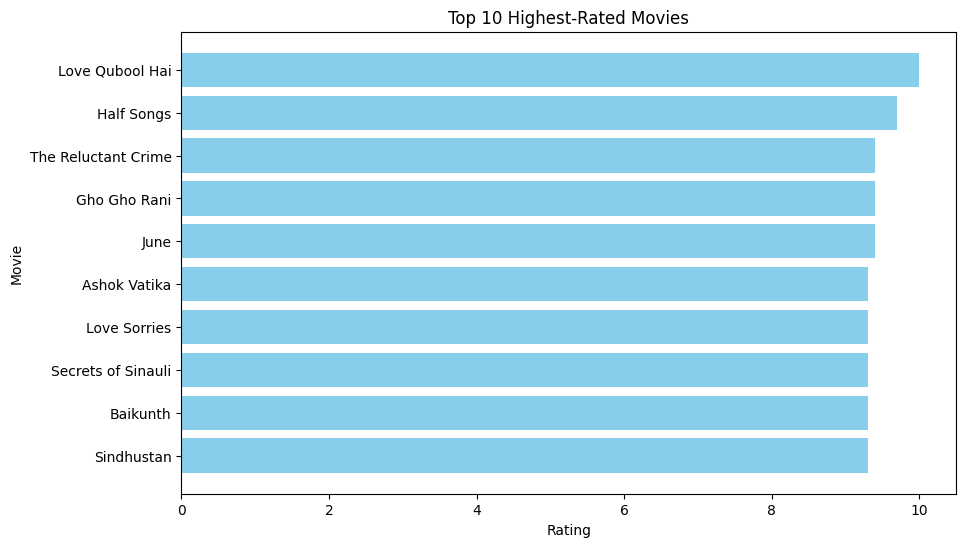

In [24]:
top_rated_movies = dataset.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_rated_movies['Name'], top_rated_movies['Rating'], color='skyblue')
plt.xlabel('Rating') # Label for the x-axis (Rating)
plt.ylabel('Movie') # Label for the y-axis (Movie)
plt.title('Top 10 Highest-Rated Movies')
plt.gca().invert_yaxis()
plt.show()

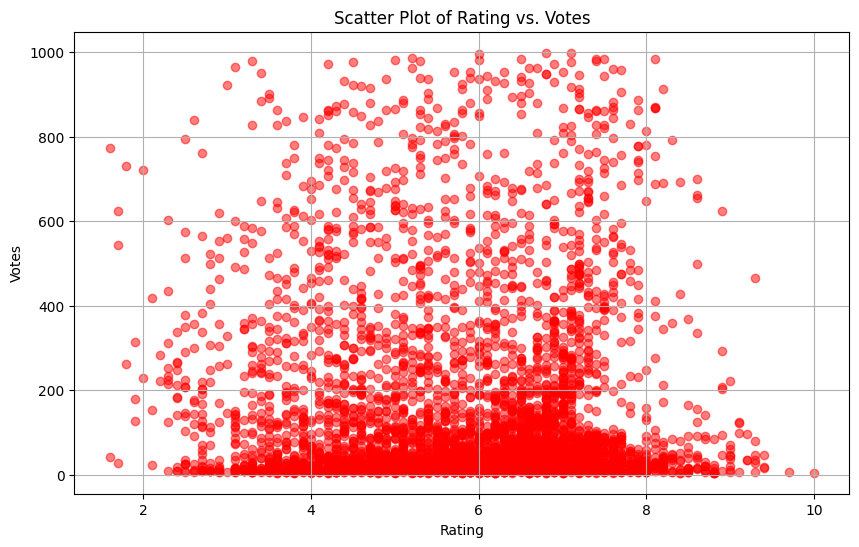

In [26]:
dataset['Votes'] = pd.to_numeric(dataset['Votes'], errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(dataset['Rating'], dataset['Votes'], alpha=0.5, color='r')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs. Votes')
plt.grid(True)
plt.show()

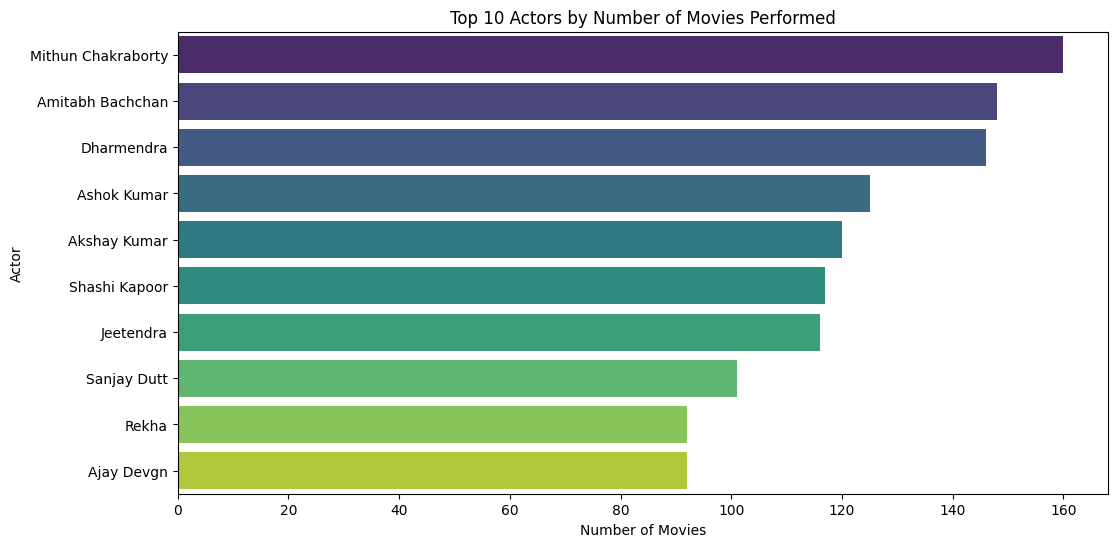

In [28]:
actors = pd.concat([dataset['Actor 1'], dataset['Actor 2'], dataset['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor', 'Number of Movies']
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Movies', y='Actor', data=actor_counts.head(10), palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

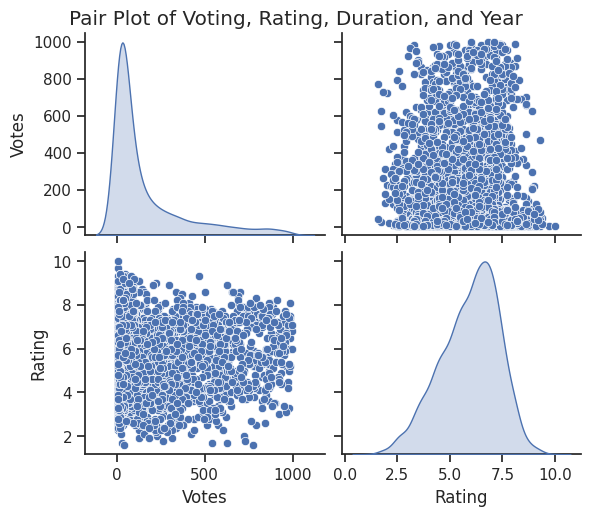

In [30]:
columns_of_interest = ['Votes', 'Rating', 'Duration', 'Year']
sns.set(style='ticks')
sns.pairplot(dataset[columns_of_interest], diag_kind='kde', markers='o', palette='viridis', height=2.5, aspect=1.2)
plt.suptitle('Pair Plot of Voting, Rating, Duration, and Year', y=1.02)
plt.show()

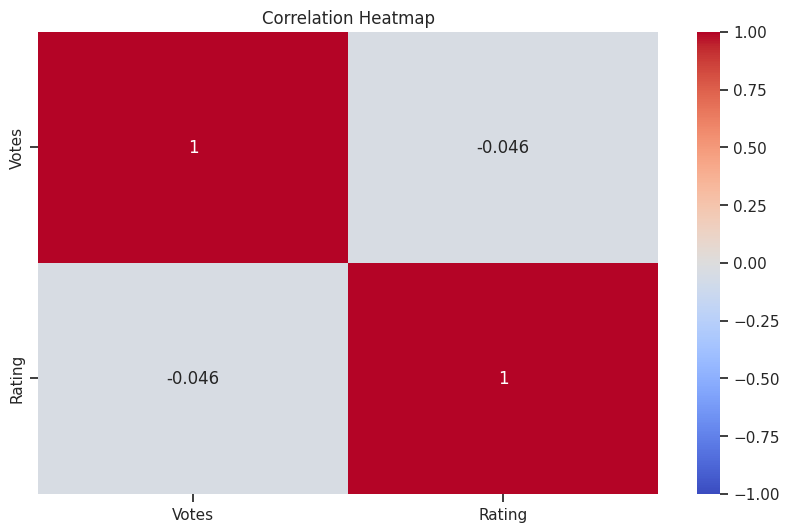

In [32]:
numerical_columns = ['Votes', 'Rating', 'Duration', 'Year']
correlation_matrix = dataset[numerical_columns].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
dataset_sorted = dataset.sort_values(by='Votes', ascending=False)

dataset_sorted['Vote_Count_Percentile'] = dataset_sorted['Votes'].rank(pct=True) * 100

dataset_sorted.reset_index(drop=True, inplace=True)

print(dataset_sorted[['Name', 'Votes', 'Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977689
2                              Kurukshetra  996.0              99.955377
3                              Dishkiyaoon  986.0              99.933066
4                               Kadvi Hawa  985.0              99.899598
...                                    ...    ...                    ...
5846                                 Ziddi    NaN                    NaN
5847                        Zila Ghaziabad    NaN                    NaN
5848                                 Zinda    NaN                    NaN
5849              Zindagi Na Milegi Dobara    NaN                    NaN
5850                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [36]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [38]:
dataset = dataset.dropna(subset = ['Votes'])
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [40]:
dataset['Year'] = dataset['Year'].astype(str)
dataset['Duration'] = dataset['Duration'].astype(str)
dataset['Year'] = dataset['Year'].str.extract('(\d+)').astype(float)
dataset['Duration'] = dataset['Duration'].str.extract('(\d+)').astype(float)
X = dataset[['Year', 'Duration', 'Votes']]
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have already trained and made predictions with your model and stored them in y_pred

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error: 0.33300198932939756
Root Mean Squared Error: 0.417291138989791
R-squared (R2) Score: -1.3354035116819483


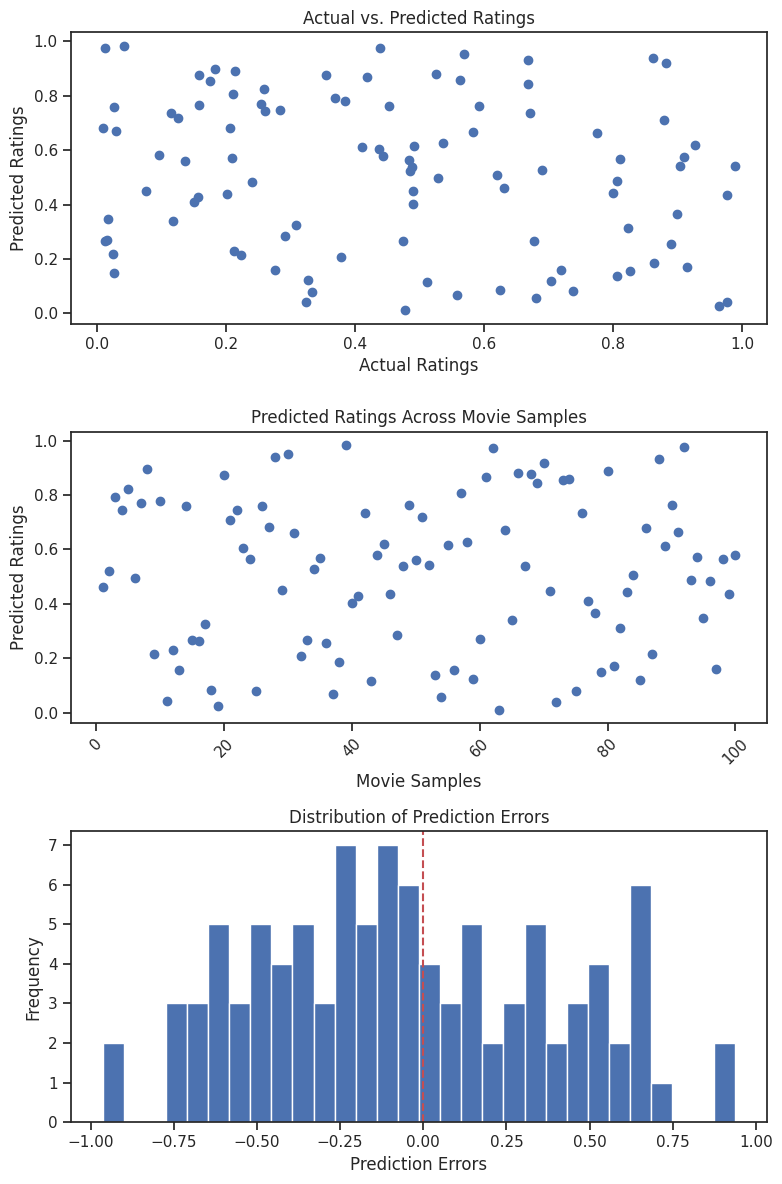

In [53]:
# Generate random data for demonstration
y_test = np.random.rand(100)
y_pred = np.random.rand(100)
errors = y_test - y_pred
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
# Scatter plot of actual vs predicted ratings
axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs. Predicted Ratings")
# Line plot of predicted ratings across movie samples
movie_samples = np.arange(1, len(y_pred) + 1)
axs[1].plot(movie_samples, y_pred, marker='o', linestyle='')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Samples")
axs[1].tick_params(axis='x', rotation=45)
# Histogram of prediction errors
axs[2].hist(errors, bins=30)
axs[2].set_xlabel("Prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()